<a href="https://colab.research.google.com/github/RPAlbuquerque/consumer-privacy-sentiment-analysis/blob/main/Privacy_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##🔹 Block 1 — Filtering Tweets from USA (2020–2023) — Robust Parallel Version

In [ ]:
import os
import gzip
import glob
import re
import pandas as pd
from datetime import datetime
from multiprocessing import Pool, cpu_count
from tqdm import tqdm
import warnings

# -------------------------------
# Block 1 — Filtering Tweets (USA, EN, 2020–2023) in Parallel
# -------------------------------

# 0. Silence dtype warnings from pandas
warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)

# 1. Configuration
keywords_en = [
    "privacy", "data breach", "encryption", "service settings", "terms and conditions",
    "authentication", "digital anxiety", "digital disconnection",
    "digital well-being", "social media disconnection", "digital detox"
]
regex_keywords_en = re.compile("|".join(keywords_en), re.IGNORECASE)

start_date = pd.to_datetime("2020-01-01")
end_date = pd.to_datetime("2023-07-31")
years = range(2020, 2024)
base_dir_root = "/n/holylabs/LABS/cga/Lab/data/geo-tweets/cga-sbg-tweets/"
output_path = "/n/netscratch/cga/Lab/rpalbuquerque/Privacy/Tweets_Privacy_DigitalWellbeing_USA_2020_01_to_2023_07.csv.gz"

# 2. Get all relevant file paths from 2020 to 2023
all_files = []
for year in years:
    year_dir = os.path.join(base_dir_root, str(year))
    files = glob.glob(os.path.join(year_dir, "*.csv.gz"))
    all_files.extend(files)
print(f"📁 Total files to process: {len(all_files)}")

# 3. Function to process a single file with column-checking
def process_file(file):
    try:
        with gzip.open(file, "rt", encoding="utf-8") as f:
            df = pd.read_csv(f, delimiter="\t")

        required_cols = ["message_id", "date", "text", "tweet_lang", "place", "latitude", "longitude"]
        missing_cols = [col for col in required_cols if col not in df.columns]
        if missing_cols:
            print(f"⚠️ Skipped {os.path.basename(file)} — Missing columns: {missing_cols}")
            return None

        df = df[required_cols]
        df["date"] = pd.to_datetime(df["date"], errors="coerce")
        df = df.dropna(subset=["date"])
        df = df[(df["date"] >= start_date) & (df["date"] <= end_date)]
        df = df[df["tweet_lang"] == "en"]
        df["match"] = df["text"].apply(lambda x: bool(regex_keywords_en.search(str(x))))
        df = df[df["match"]]
        df = df[df["place"].str.contains(r"United States|USA|US", case=False, na=False)]

        if not df.empty:
            return df
    except Exception as e:
        print(f"❌ Error in {file}: {e}")
    return None

# 4. Run in parallel with progress bar
results = []
with Pool(processes=64) as pool:
    for result in tqdm(pool.imap_unordered(process_file, all_files), total=len(all_files)):
        if result is not None:
            results.append(result)

# 5. Save results
if results:
    df_final = pd.concat(results, ignore_index=True)
    print(f"\n📊 Total tweets filtered: {len(df_final):,}")
    df_final.to_csv(output_path, index=False, compression="gzip")
    print(f"✅ File saved to: {output_path}")
else:
    print("⚠️ No tweets matched the filters.")

📁 Total files to process: 29831


  0%|          | 0/29831 [00:00<?, ?it/s]

❌ Error in /n/holylabs/LABS/cga/Lab/data/geo-tweets/cga-sbg-tweets/2020/2020_9_01_06.csv.gz: 'place'


  2%|▏         | 712/29831 [00:28<20:51, 23.28it/s]

❌ Error in /n/holylabs/LABS/cga/Lab/data/geo-tweets/cga-sbg-tweets/2020/2020_9_02_06.csv.gz: 'place'


  3%|▎         | 906/29831 [00:35<15:55, 30.27it/s]/tmp/ipykernel_2814323/37391100.py:53: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date"] = pd.to_datetime(df["date"], errors="coerce")
  5%|▍         | 1388/29831 [00:54<18:22, 25.81it/s]

❌ Error in /n/holylabs/LABS/cga/Lab/data/geo-tweets/cga-sbg-tweets/2020/2020_9_04_04.csv.gz: 'place'


 11%|█         | 3224/29831 [02:06<25:06, 17.67it/s]

❌ Error in /n/holylabs/LABS/cga/Lab/data/geo-tweets/cga-sbg-tweets/2020/2020_9_01_08.csv.gz: 'place'


 12%|█▏        | 3603/29831 [02:21<13:29, 32.41it/s]

❌ Error in /n/holylabs/LABS/cga/Lab/data/geo-tweets/cga-sbg-tweets/2020/2020_9_02_05.csv.gz: 'place'


 13%|█▎        | 3973/29831 [02:35<13:14, 32.55it/s]

❌ Error in /n/holylabs/LABS/cga/Lab/data/geo-tweets/cga-sbg-tweets/2020/2020_9_04_02.csv.gz: 'place'


 14%|█▎        | 4033/29831 [02:38<16:39, 25.81it/s]

❌ Error in /n/holylabs/LABS/cga/Lab/data/geo-tweets/cga-sbg-tweets/2020/2020_9_06_04.csv.gz: 'place'


 16%|█▌        | 4723/29831 [03:06<20:11, 20.72it/s]

❌ Error in /n/holylabs/LABS/cga/Lab/data/geo-tweets/cga-sbg-tweets/2020/2020_10_26_05.csv.gz: 'place'


 19%|█▉        | 5753/29831 [03:47<17:36, 22.78it/s]/tmp/ipykernel_2814323/37391100.py:53: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date"] = pd.to_datetime(df["date"], errors="coerce")
 20%|█▉        | 5839/29831 [03:51<17:26, 22.92it/s]

❌ Error in /n/holylabs/LABS/cga/Lab/data/geo-tweets/cga-sbg-tweets/2020/2020_9_01_10.csv.gz: 'place'


 22%|██▏       | 6669/29831 [04:24<18:47, 20.54it/s]

❌ Error in /n/holylabs/LABS/cga/Lab/data/geo-tweets/cga-sbg-tweets/2020/2020_9_06_00.csv.gz: 'place'


 24%|██▍       | 7215/29831 [04:46<17:05, 22.04it/s]/tmp/ipykernel_2814323/37391100.py:53: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date"] = pd.to_datetime(df["date"], errors="coerce")
 32%|███▏      | 9518/29831 [06:08<08:18, 40.76it/s]

❌ Error in /n/holylabs/LABS/cga/Lab/data/geo-tweets/cga-sbg-tweets/2021/2021_4_19_16.csv.gz: 'place'


 36%|███▌      | 10688/29831 [06:43<09:06, 35.00it/s]/tmp/ipykernel_2814323/37391100.py:53: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date"] = pd.to_datetime(df["date"], errors="coerce")
 39%|███▉      | 11729/29831 [07:14<08:51, 34.06it/s]/tmp/ipykernel_2814323/37391100.py:53: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date"] = pd.to_datetime(df["date"], errors="coerce")
 39%|███▉      | 11741/29831 [07:14<07:59, 37.74it/s]/tmp/ipykernel_2814323/37391100.py:53: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date"] = pd.to_datetime(df["date"], errors="coer

❌ Error in /n/holylabs/LABS/cga/Lab/data/geo-tweets/cga-sbg-tweets/2021/2021_1_11_06.csv.gz: 'place'


 47%|████▋     | 14144/29831 [08:25<07:17, 35.87it/s]

❌ Error in /n/holylabs/LABS/cga/Lab/data/geo-tweets/cga-sbg-tweets/2021/2021_4_19_07.csv.gz: 'place'


 48%|████▊     | 14182/29831 [08:26<07:36, 34.28it/s]

❌ Error in /n/holylabs/LABS/cga/Lab/data/geo-tweets/cga-sbg-tweets/2021/2021_1_11_07.csv.gz: 'place'


 52%|█████▏    | 15377/29831 [09:02<06:09, 39.16it/s]

❌ Error in /n/holylabs/LABS/cga/Lab/data/geo-tweets/cga-sbg-tweets/2021/2021_4_19_17.csv.gz: 'place'


 63%|██████▎   | 18921/29831 [10:56<05:53, 30.88it/s]/tmp/ipykernel_2814323/37391100.py:53: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date"] = pd.to_datetime(df["date"], errors="coerce")
 67%|██████▋   | 20117/29831 [11:36<06:04, 26.67it/s]/tmp/ipykernel_2814323/37391100.py:53: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date"] = pd.to_datetime(df["date"], errors="coerce")
 72%|███████▏  | 21591/29831 [12:26<04:53, 28.03it/s]/tmp/ipykernel_2814323/37391100.py:53: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date"] = pd.to_datetime(df["date"], errors="coer

❌ Error in /n/holylabs/LABS/cga/Lab/data/geo-tweets/cga-sbg-tweets/2022/2022_1_23_23.csv.gz: 'place'


 76%|███████▌  | 22555/29831 [12:58<03:53, 31.20it/s]/tmp/ipykernel_2814323/37391100.py:53: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date"] = pd.to_datetime(df["date"], errors="coerce")
 83%|████████▎ | 24612/29831 [14:07<02:16, 38.22it/s]/tmp/ipykernel_2814323/37391100.py:53: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date"] = pd.to_datetime(df["date"], errors="coerce")
 93%|█████████▎| 27817/29831 [15:16<00:30, 65.61it/s]/tmp/ipykernel_2814323/37391100.py:53: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date"] = pd.to_datetime(df["date"], errors="coer


📊 Total tweets filtered: 22,758
✅ File saved to: /n/netscratch/cga/Lab/rpalbuquerque/Privacy/Tweets_Privacy_DigitalWellbeing_USA_2020_01_to_2023_07.csv.gz


In [ ]:
##🔹 Block 2 — Sentiment Analysis using RoBERTa (GPU + tqdm)

In [ ]:
import os
import pandas as pd
from transformers import pipeline
import torch
from tqdm import tqdm

# -------------------------------
# Block 2 — Sentiment Analysis with RoBERTa
# -------------------------------

# 1. Paths and parameters
input_file = "/n/netscratch/cga/Lab/rpalbuquerque/Privacy/Tweets_Privacy_DigitalWellbeing_USA_2020_01_to_2023_07.csv.gz"
output_file = "/n/netscratch/cga/Lab/rpalbuquerque/Privacy/Tweets_Analyzed_Sentiment.csv.gz"

# 2. Load data
df = pd.read_csv(input_file, compression="gzip")
print(f"📥 Tweets loaded: {len(df):,}")

# 3. Load sentiment analysis pipeline (GPU if available)
device = 0 if torch.cuda.is_available() else -1
classifier = pipeline(
    "text-classification",
    model="cardiffnlp/twitter-roberta-base-sentiment",
    tokenizer="cardiffnlp/twitter-roberta-base-sentiment",
    device=device
)

# 4. Apply sentiment analysis with progress bar
sentiments = []
scores = []

print("🔍 Running sentiment analysis...")
for text in tqdm(df["text"], total=len(df)):
    try:
        result = classifier(str(text)[:512])[0]
        sentiments.append(result["label"])
        scores.append(result["score"])
    except Exception as e:
        sentiments.append("ERROR")
        scores.append(0.0)

# 5. Append results and save
df["Sentiment"] = sentiments
df["Sentiment_Score"] = scores

df.to_csv(output_file, index=False, compression="gzip")
print(f"\n✅ Sentiment analysis completed and saved to: {output_file}")

📥 Tweets loaded: 22,758


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

🔍 Running sentiment analysis...


100%|██████████| 22758/22758 [01:55<00:00, 196.96it/s]



✅ Sentiment analysis completed and saved to: /n/netscratch/cga/Lab/rpalbuquerque/Privacy/Tweets_Analyzed_Sentiment.csv.gz


In [ ]:
##🔹 Block 2B — Visualize Sentiment Output (Quick Check)

In [ ]:
import pandas as pd

# Load the file with sentiment results
file_path = "/n/netscratch/cga/Lab/rpalbuquerque/Privacy/Tweets_Analyzed_Sentiment.csv.gz"

# Read the file
df = pd.read_csv(file_path, compression="gzip")

# Show a sample with relevant columns
sample = df[["date", "text", "Sentiment", "Sentiment_Score"]].sample(10, random_state=42)
print(sample.to_string(index=False))

               date                                                                                                                                                                                                                                                                                            text Sentiment  Sentiment_Score
2022-05-20 11:00:45 7 data breach reporting rules banks need to understand\n\nKnow more: https://t.co/ISpT4smJwt\n\n#DataSecurity #Privacy #100DaysOfCode #Cloud #Security\n#MachineLearning #Phishing #Ransomware #Cybersecurity \n#CyberAttacks #DataProtection #Malware #Hacked #Infosec https://t.co/GYBGlO5xjr   LABEL_1         0.529161
2020-12-05 15:34:37                                                                                                                          Just bought a gift through Amazon and I'm creeped out by the numerous dark UI patterns and privacy-violating data sharing. This is part of why I rarely buy from them.   LABEL_0         0.96

In [ ]:
##🔹 Block 3 — Sentiment Label Mapping (RoBERTa → Clean Labels)

In [ ]:
import pandas as pd
import os

# -------------------------------
# Block 3 — Mapping RoBERTa sentiment labels
# -------------------------------

# 1. Paths
input_file = "/n/netscratch/cga/Lab/rpalbuquerque/Privacy/Tweets_Analyzed_Sentiment.csv.gz"
output_file = "/n/netscratch/cga/Lab/rpalbuquerque/Privacy/Tweets_Analyzed_Sentiment_Clean.csv.gz"

# 2. Load dataset
df = pd.read_csv(input_file, compression="gzip")
print(f"📥 Tweets loaded: {len(df):,}")

# 3. Map sentiment labels
label_map = {
    "LABEL_0": "Negative",
    "LABEL_1": "Neutral",
    "LABEL_2": "Positive"
}
df["Sentiment"] = df["Sentiment"].map(label_map)

# 4. Save cleaned file
df.to_csv(output_file, index=False, compression="gzip")
print(f"✅ Sentiment labels mapped and file saved to: {output_file}")

# 5. Show new label distribution
print("\n📊 Distribution of cleaned sentiment labels:")
print(df["Sentiment"].value_counts(normalize=True).round(4) * 100)

📥 Tweets loaded: 22,758
✅ Sentiment labels mapped and file saved to: /n/netscratch/cga/Lab/rpalbuquerque/Privacy/Tweets_Analyzed_Sentiment_Clean.csv.gz

📊 Distribution of cleaned sentiment labels:
Sentiment
Negative    42.77
Neutral     42.69
Positive    14.54
Name: proportion, dtype: float64


In [ ]:
##🔹 Block 4 — Emotional Profiling com Empath (Final)

In [ ]:
import sys
!{sys.executable} -m pip install empath --no-warn-script-location

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for empath: filename=empath-0.89-py3-none-any.whl size=57801 sha256=719491f3c44504ad428e298fc2c6ee8895231cecedd1d59befa9a7d6d35d1f38
  Stored in directory: /n/home03/rpereiraalbuquerque/.cache/pip/wheels/2a/e5/c2/fd8dad0a452927c85ecd3c6cbaa4748125246eed73d8303184
Successfully built empath


In [ ]:
import pandas as pd
from empath import Empath
from tqdm import tqdm
import os

# -------------------------------
# Block 4 — Emotional Profiling using Empath
# -------------------------------

# 1. Caminhos
input_file = "/n/netscratch/cga/Lab/rpalbuquerque/Privacy/Tweets_Analyzed_Sentiment_Clean.csv.gz"
output_file = "/n/netscratch/cga/Lab/rpalbuquerque/Privacy/Tweets_Analyzed_Emotions.csv.gz"

# 2. Carregar os tweets
df = pd.read_csv(input_file, compression="gzip")
print(f"📥 Tweets loaded: {len(df):,}")

# 3. Inicializar Empath
lexicon = Empath()
tqdm.pandas()

# 4. Emoções de interesse (Empath usa essas categorias exatas)
emotion_categories = [
    "positive_emotion", "negative_emotion", "anger", "fear",
    "sadness", "trust", "joy", "surprise"
]

# 5. Função para aplicar a análise
def analyze_emotions(text):
    emotions = lexicon.analyze(str(text), categories=emotion_categories, normalize=True)
    return pd.Series(emotions)

# 6. Aplicar com barra de progresso
print("🎭 Extracting Empath-based emotional scores...")
emotion_scores = df["text"].progress_apply(analyze_emotions)

# 7. Mesclar e salvar
df_emotions = pd.concat([df, emotion_scores], axis=1)
df_emotions.to_csv(output_file, index=False, compression="gzip")

print(f"\n✅ Emotional profiling completed and saved to: {output_file}")

# 8. Estatísticas gerais
print("\n📊 Most frequent emotions (mean score across tweets):")
print(df_emotions[emotion_categories].mean().sort_values(ascending=False).round(6))

📥 Tweets loaded: 22,758
🎭 Extracting Empath-based emotional scores...


100%|██████████| 22758/22758 [00:06<00:00, 3342.94it/s]



✅ Emotional profiling completed and saved to: /n/netscratch/cga/Lab/rpalbuquerque/Privacy/Tweets_Analyzed_Emotions.csv.gz

📊 Most frequent emotions (mean score across tweets):
positive_emotion    0.007406
negative_emotion    0.005812
trust               0.005299
sadness             0.000859
fear                0.000641
surprise            0.000277
anger               0.000243
joy                 0.000222
dtype: float64


In [ ]:
## Block 5 — Classification of Psychological and Wellbeing Consequences

In [ ]:
import pandas as pd
import re
import os
from multiprocessing import Pool, cpu_count
from tqdm import tqdm

# -------------------------------
# Block 5 — Classification of Psychological and Wellbeing Consequences
# -------------------------------

# 1. Config
input_file = "/n/netscratch/cga/Lab/rpalbuquerque/Privacy/Tweets_Analyzed_Emotions.csv.gz"
output_file = "/n/netscratch/cga/Lab/rpalbuquerque/Privacy/Tweets_Classified_Consequences.csv.gz"

# 2. Load data
df = pd.read_csv(input_file, compression="gzip")
print(f"📥 Tweets loaded: {len(df):,}")

# 3. Keyword dictionaries
psychological_keywords = {
    "Anxiety": ["anxiety", "stress", "worry", "fear", "panic", "paranoia"],
    "Distrust": ["mistrust", "distrust", "skeptical", "doubt", "concern", "suspicion"],
    "Anger": ["angry", "frustrated", "outraged", "furious", "irritated"],
    "Depression": ["depression", "hopeless", "sad", "down", "overwhelmed", "despair"]
}

wellbeing_keywords = {
    "Digital Fatigue": ["burnout", "tired", "exhausted", "overwhelmed", "drained", "fatigue"],
    "Disconnection": ["detox", "disconnection", "logging off", "taking a break", "disconnecting"],
    "Autonomy": ["freedom", "control", "autonomy", "empowered", "independence"],
    "Positive Impact": ["relieved", "peaceful", "better", "happier", "joyful", "uplifted"]
}

# 4. Classifiers
def classify_consequences(text):
    text = str(text).lower()
    psycho = [cat for cat, kws in psychological_keywords.items() if any(re.search(rf"\b{k}\b", text) for k in kws)]
    well = [cat for cat, kws in wellbeing_keywords.items() if any(re.search(rf"\b{k}\b", text) for k in kws)]
    return psycho, well

# 5. Parallel processing
def apply_parallel(df, func, text_col):
    with Pool(cpu_count()) as pool:
        results = list(tqdm(pool.imap(func, df[text_col]), total=len(df), desc="🔍 Classifying"))
    return results

# 6. Run classification
results = apply_parallel(df, classify_consequences, "text")
df["Psychological_Impact"] = [r[0] for r in results]
df["Wellbeing_Impact"] = [r[1] for r in results]

# 7. Save
df.to_csv(output_file, index=False, compression="gzip")
print(f"\n✅ Consequences classified and saved to: {output_file}")

# 8. Summary
print("\n📊 Top Psychological Impacts:")
print(df["Psychological_Impact"].explode().value_counts().head(10))
print("\n📊 Top Wellbeing Impacts:")
print(df["Wellbeing_Impact"].explode().value_counts().head(10))

📥 Tweets loaded: 22,758


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 


✅ Consequences classified and saved to: /n/netscratch/cga/Lab/rpalbuquerque/Privacy/Tweets_Classified_Consequences.csv.gz

📊 Top Psychological Impacts:
Psychological_Impact
Depression    385
Anxiety       159
Distrust      114
Anger          36
Name: count, dtype: int64

📊 Top Wellbeing Impacts:
Wellbeing_Impact
Autonomy           703
Positive Impact    320
Disconnection       83
Digital Fatigue     53
Name: count, dtype: int64


In [ ]:
## Block 6 — Visualization of Classified Consequences

📥 Tweets loaded: 22,758


/tmp/ipykernel_2814323/1468394898.py:37: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_2814323/1468394898.py:38: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.savefig(os.path.join(output_dir, "Impacto_Psicologico_Sentimento.png"))
/n/home03/rpereiraalbuquerque/meu_ambiente_bertopic/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


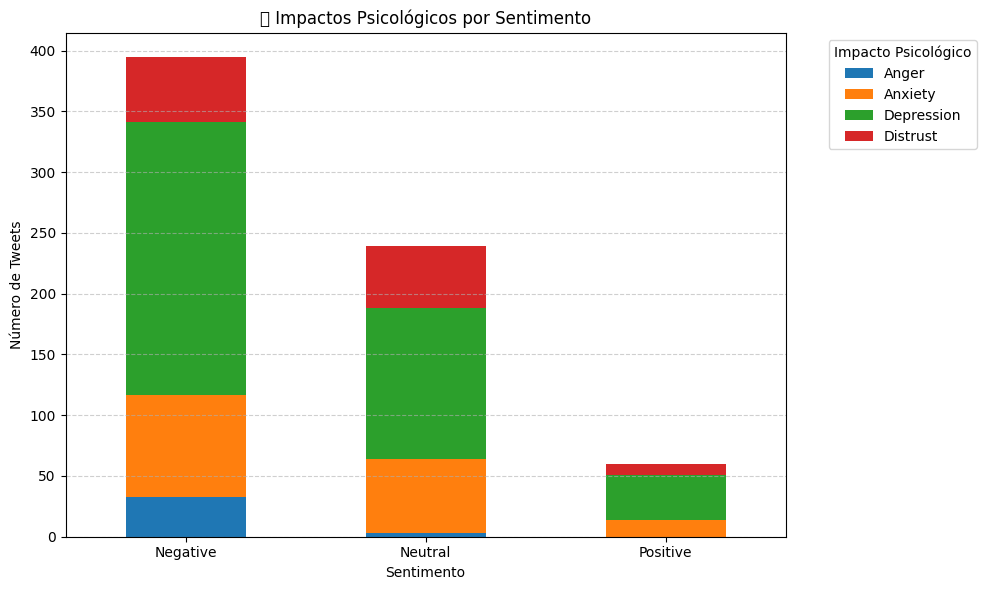

/tmp/ipykernel_2814323/1468394898.py:49: UserWarning: Glyph 127807 (\N{HERB}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_2814323/1468394898.py:50: UserWarning: Glyph 127807 (\N{HERB}) missing from current font.
  plt.savefig(os.path.join(output_dir, "Impacto_BemEstar_Sentimento.png"))
/n/home03/rpereiraalbuquerque/meu_ambiente_bertopic/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127807 (\N{HERB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


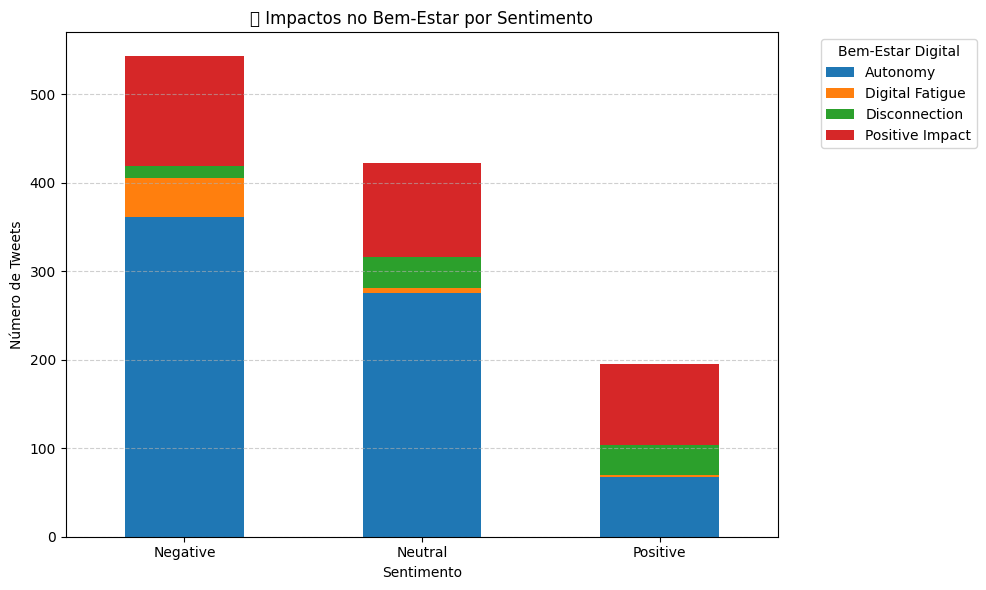


✅ Gráficos e tabelas salvos em: /n/netscratch/cga/Lab/rpalbuquerque/Privacy/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# -------------------------------
# Block 6 — Visualization of Classified Consequences
# -------------------------------

# 1. Caminhos
input_file = "/n/netscratch/cga/Lab/rpalbuquerque/Privacy/Tweets_Classified_Consequences.csv.gz"
output_dir = "/n/netscratch/cga/Lab/rpalbuquerque/Privacy/"
os.makedirs(output_dir, exist_ok=True)

# 2. Carregar base
df = pd.read_csv(input_file, compression="gzip")
print(f"📥 Tweets loaded: {len(df):,}")

# 3. Garantir listas válidas
df["Psychological_Impact"] = df["Psychological_Impact"].apply(lambda x: eval(x) if isinstance(x, str) else x)
df["Wellbeing_Impact"] = df["Wellbeing_Impact"].apply(lambda x: eval(x) if isinstance(x, str) else x)

# 4. Explodir as colunas
df_exploded = df.explode("Psychological_Impact").explode("Wellbeing_Impact")

# 5. Resumo por sentimento
psych_counts = df_exploded.groupby("Sentiment")["Psychological_Impact"].value_counts().unstack().fillna(0)
well_counts = df_exploded.groupby("Sentiment")["Wellbeing_Impact"].value_counts().unstack().fillna(0)

# 6. Gráfico: Impactos Psicológicos
psych_counts.plot(kind="bar", figsize=(10, 6), stacked=True)
plt.title("🔍 Impactos Psicológicos por Sentimento")
plt.ylabel("Número de Tweets")
plt.xlabel("Sentimento")
plt.legend(title="Impacto Psicológico", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "Impacto_Psicologico_Sentimento.png"))
plt.show()

# 7. Gráfico: Impactos no Bem-Estar
well_counts.plot(kind="bar", figsize=(10, 6), stacked=True)
plt.title("🌿 Impactos no Bem-Estar por Sentimento")
plt.ylabel("Número de Tweets")
plt.xlabel("Sentimento")
plt.legend(title="Bem-Estar Digital", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "Impacto_BemEstar_Sentimento.png"))
plt.show()

# 8. Exportar tabelas
psych_counts.to_csv(os.path.join(output_dir, "Resumo_Impactos_Psicologicos.csv"))
well_counts.to_csv(os.path.join(output_dir, "Resumo_Impactos_BemEstar.csv"))

print(f"\n✅ Gráficos e tabelas salvos em: {output_dir}")


In [ ]:
##🔹 Block 7 — Temporal Analysis of Consequences

📆 Temporal range: 2020-01 to 2023-07


/tmp/ipykernel_2814323/2547702887.py:35: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_2814323/2547702887.py:36: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  plt.savefig(os.path.join(output_dir, "Timeline_Psychological_Impacts.png"))
/n/home03/rpereiraalbuquerque/meu_ambiente_bertopic/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


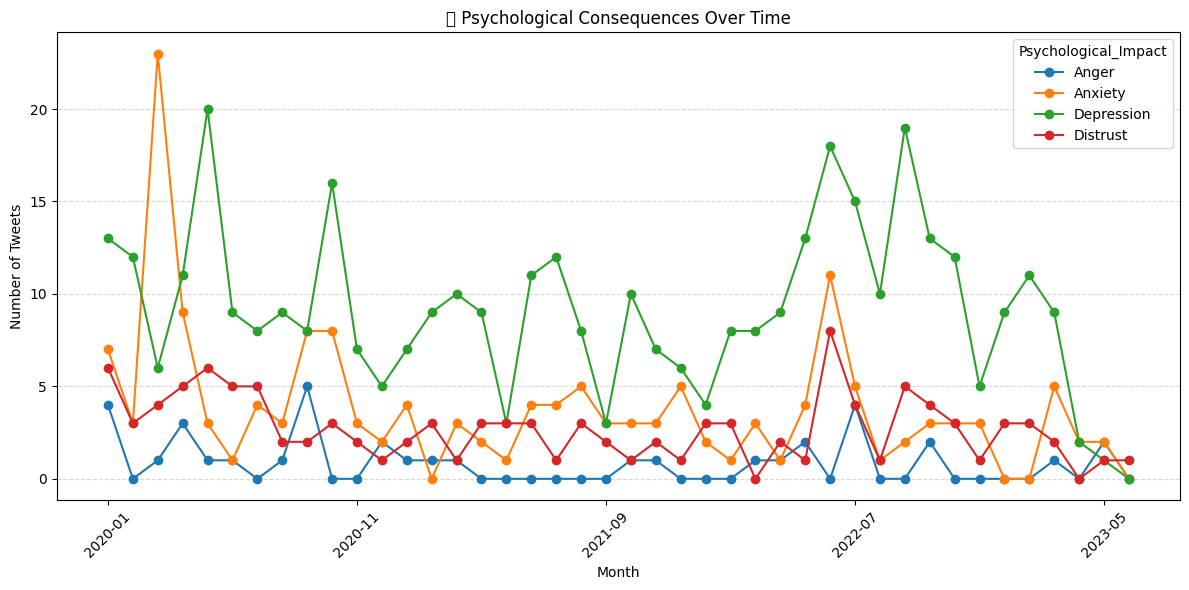

/tmp/ipykernel_2814323/2547702887.py:47: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_2814323/2547702887.py:48: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.savefig(os.path.join(output_dir, "Timeline_Wellbeing_Impacts.png"))
/n/home03/rpereiraalbuquerque/meu_ambiente_bertopic/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


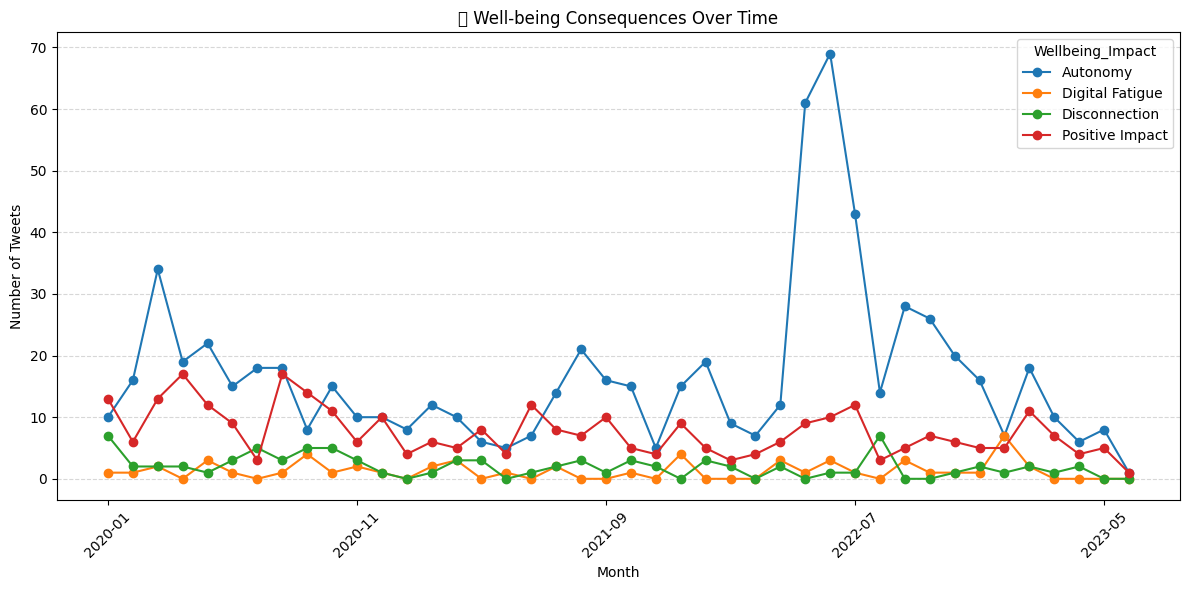


✅ Temporal tables and graphs saved to: /n/netscratch/cga/Lab/rpalbuquerque/Privacy/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# -------------------------------
# Block 7 — Temporal Analysis of Consequences
# -------------------------------

# 1. Paths
input_file = "/n/netscratch/cga/Lab/rpalbuquerque/Privacy/Tweets_Classified_Consequences.csv.gz"
output_dir = "/n/netscratch/cga/Lab/rpalbuquerque/Privacy/"
os.makedirs(output_dir, exist_ok=True)

# 2. Load data
df = pd.read_csv(input_file, compression="gzip")
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df = df.dropna(subset=["date"])
df["month"] = df["date"].dt.to_period("M").astype(str)
print(f"📆 Temporal range: {df['month'].min()} to {df['month'].max()}")

# 3. Clean categories
df["Psychological_Impact"] = df["Psychological_Impact"].apply(lambda x: eval(x) if isinstance(x, str) else x)
df["Wellbeing_Impact"] = df["Wellbeing_Impact"].apply(lambda x: eval(x) if isinstance(x, str) else x)

df_exploded = df.explode("Psychological_Impact").explode("Wellbeing_Impact")

# 4. Psychological Impacts over Time
psych_timeline = df_exploded.groupby(["month", "Psychological_Impact"]).size().unstack().fillna(0)
psych_timeline.plot(figsize=(12, 6), marker="o")
plt.title("📉 Psychological Consequences Over Time")
plt.ylabel("Number of Tweets")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "Timeline_Psychological_Impacts.png"))
plt.show()

# 5. Wellbeing Impacts over Time
well_timeline = df_exploded.groupby(["month", "Wellbeing_Impact"]).size().unstack().fillna(0)
well_timeline.plot(figsize=(12, 6), marker="o")
plt.title("📈 Well-being Consequences Over Time")
plt.ylabel("Number of Tweets")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "Timeline_Wellbeing_Impacts.png"))
plt.show()

# 6. Save tables
psych_timeline.to_csv(os.path.join(output_dir, "Timeline_Psychological_Impacts.csv"))
well_timeline.to_csv(os.path.join(output_dir, "Timeline_Wellbeing_Impacts.csv"))
print(f"\n✅ Temporal tables and graphs saved to: {output_dir}")

In [ ]:
##🔹Block 8 — Topic Modeling with BERT + KMeans

📥 Tweets loaded for topic modeling: 22,758
🔍 Generating BERT embeddings...


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/178 [00:00<?, ?it/s]

📊 Running KMeans clustering...


/n/home03/rpereiraalbuquerque/meu_ambiente_bertopic/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


🧠 Extracting keywords per topic...


/tmp/ipykernel_2814323/1796983788.py:64: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_2814323/1796983788.py:65: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from current font.
  plt.savefig(os.path.join(output_dir, "Topic_Distribution.png"))
/n/home03/rpereiraalbuquerque/meu_ambiente_bertopic/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


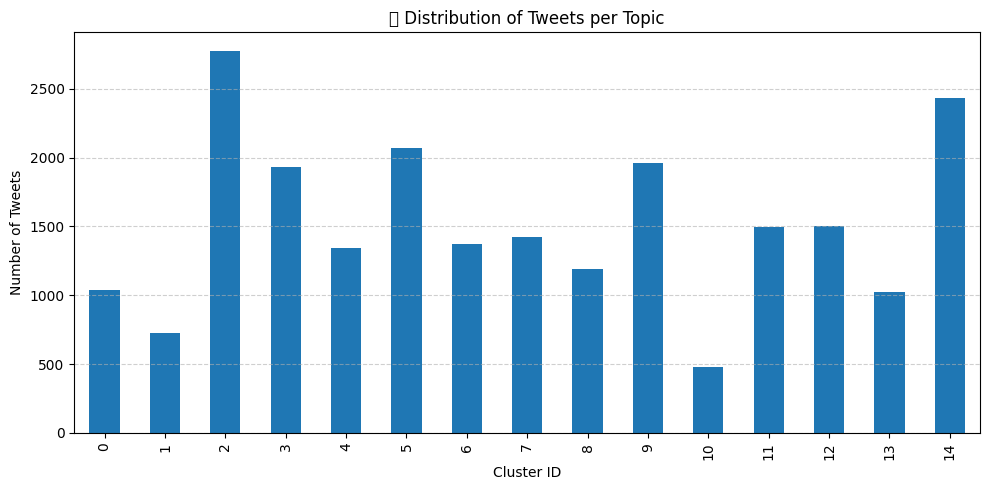


✅ Topic modeling completed and saved in: /n/netscratch/cga/Lab/rpalbuquerque/Privacy/


In [ ]:
import pandas as pd
import os
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import MiniBatchKMeans
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt

# -------------------------------
# Block 8 — Topic Modeling with BERT + KMeans
# -------------------------------

# 1. Configurations
input_file = "/n/netscratch/cga/Lab/rpalbuquerque/Privacy/Tweets_Analyzed_Sentiment_Clean.csv.gz"
output_dir = "/n/netscratch/cga/Lab/rpalbuquerque/Privacy/"
os.makedirs(output_dir, exist_ok=True)
n_clusters = 15  # pode ajustar depois com silhouette score

# 2. Load Data
df = pd.read_csv(input_file, compression="gzip")
df = df.dropna(subset=["text"])
texts = df["text"].astype(str).tolist()
print(f"📥 Tweets loaded for topic modeling: {len(texts):,}")

# 3. Generate BERT Embeddings
print("🔍 Generating BERT embeddings...")
model = SentenceTransformer("all-MiniLM-L6-v2", device="cuda")
embeddings = model.encode(texts, show_progress_bar=True, batch_size=128)

# 4. Clustering with KMeans
print("📊 Running KMeans clustering...")
kmeans = MiniBatchKMeans(n_clusters=n_clusters, batch_size=512, random_state=42)
df["Cluster"] = kmeans.fit_predict(embeddings)

# 5. Extract keywords per cluster using TF-IDF
print("🧠 Extracting keywords per topic...")
vectorizer = TfidfVectorizer(stop_words="english", max_features=10000)
X_tfidf = vectorizer.fit_transform(texts)
terms = vectorizer.get_feature_names_out()

top_keywords = []
for i in range(n_clusters):
    indices = df[df["Cluster"] == i].index
    cluster_tfidf = X_tfidf[indices]
    mean_tfidf = cluster_tfidf.mean(axis=0).A1
    top_terms = [terms[idx] for idx in mean_tfidf.argsort()[-10:][::-1]]
    top_keywords.append(top_terms)

# 6. Save results
df.to_csv(os.path.join(output_dir, "Tweets_With_Topics.csv.gz"), index=False, compression="gzip")

topics_df = pd.DataFrame({
    "Cluster": list(range(n_clusters)),
    "Top_Keywords": top_keywords
})
topics_df.to_csv(os.path.join(output_dir, "Topic_Keywords.csv"), index=False)

# 7. Optional: Bar chart with distribution
df["Cluster"].value_counts().sort_index().plot(kind="bar", figsize=(10, 5))
plt.title("📌 Distribution of Tweets per Topic")
plt.xlabel("Cluster ID")
plt.ylabel("Number of Tweets")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "Topic_Distribution.png"))
plt.show()

print(f"\n✅ Topic modeling completed and saved in: {output_dir}")

In [ ]:
##🔹Block 9 — Topic Inspection and Summary Table

In [ ]:
import pandas as pd
import os

# -------------------------------
# Block 9 — Topic Inspection and Summary Table
# -------------------------------

# 1. Configurações de caminho
output_dir = "/n/netscratch/cga/Lab/rpalbuquerque/Privacy/"
topics_file = os.path.join(output_dir, "Topic_Keywords.csv")
tweets_file = os.path.join(output_dir, "Tweets_With_Topics.csv.gz")

# 2. Carregar dados
df_topics = pd.read_csv(topics_file)
df_tweets = pd.read_csv(tweets_file, compression="gzip")

# 3. Contar número de tweets por cluster
topic_counts = df_tweets["Cluster"].value_counts().sort_index()
df_topics["Num_Tweets"] = df_topics["Cluster"].map(topic_counts)

# 4. Organizar tabela para exportar
df_topics = df_topics[["Cluster", "Num_Tweets", "Top_Keywords"]]
df_topics["Top_Keywords"] = df_topics["Top_Keywords"].apply(eval).apply(lambda x: ", ".join(x))

# 5. Ordenar por número de tweets e salvar
df_topics = df_topics.sort_values(by="Num_Tweets", ascending=False)
df_topics.to_csv(os.path.join(output_dir, "Topics_Summary.csv"), index=False)

# 6. Visualizar os 10 principais tópicos
print("📋 Top 10 Topics by Volume:\n")
print(df_topics.head(10).to_string(index=False))

print(f"\n✅ Summary file saved to: {os.path.join(output_dir, 'Topics_Summary.csv')}")

📋 Top 10 Topics by Volume:

 Cluster  Num_Tweets                                                                                 Top_Keywords
       2        2772                          privacy, respect, like, don, invasion, know, sorry, https, ll, just
      14        2433                      privacy, respect, don, people, like, power, know, just, invasion, peace
       5        2069                  privacy, https, data, invasion, breach, government, rights, law, right, act
       9        1958                             https, privacy, home, fence, time, just, like, house, new, space
       3        1933                         privacy, respect, like, just, https, people, time, family, don, want
      12        1506 right, privacy, rights, abortion, women, constitution, roe, court, amendment, constitutional
      11        1494                privacy, data, https, apple, security, encryption, digital, use, tech, people
       7        1426                      conditions, terms,

In [ ]:
##🔹Block 10 — Tweet Examples by Topic Cluster

In [ ]:
import pandas as pd
import os

# -------------------------------
# Block 10 — Tweet Examples by Topic Cluster
# -------------------------------

# 1. Caminhos de entrada e saída
output_dir = "/n/netscratch/cga/Lab/rpalbuquerque/Privacy/"
tweets_file = os.path.join(output_dir, "Tweets_With_Topics.csv.gz")
output_examples = os.path.join(output_dir, "Topic_Tweet_Examples.csv.gz")

# 2. Carregar dataset com clusters
df = pd.read_csv(tweets_file, compression="gzip")

# 3. Selecionar colunas relevantes
df = df[["date", "text", "Sentiment", "Cluster"]]

# 4. Função para extrair exemplos por cluster
def sample_tweets(df, n=5):
    examples = []
    for cluster_id in sorted(df["Cluster"].unique()):
        cluster_df = df[df["Cluster"] == cluster_id]
        sampled = cluster_df.sample(n=min(n, len(cluster_df)), random_state=42)
        sampled = sampled.copy()
        sampled["Cluster"] = cluster_id
        examples.append(sampled)
    return pd.concat(examples, ignore_index=True)

# 5. Gerar amostras
df_examples = sample_tweets(df, n=5)

# 6. Renomear e reorganizar colunas
df_examples = df_examples.rename(columns={
    "text": "Tweet",
    "date": "Date",
    "Sentiment": "Sentiment_Label"
})
df_examples = df_examples[["Cluster", "Date", "Tweet", "Sentiment_Label"]]

# 7. Salvar arquivo
df_examples.to_csv(output_examples, index=False, compression="gzip")
print(f"✅ Tweet examples saved to: {output_examples}")

# 8. Visualizar os 3 primeiros por cluster
df_preview = df_examples.groupby("Cluster").head(3).reset_index(drop=True)
print("\n📋 Sample of tweet examples:")
display(df_preview)

✅ Tweet examples saved to: /n/netscratch/cga/Lab/rpalbuquerque/Privacy/Topic_Tweet_Examples.csv.gz

📋 Sample of tweet examples:


,Cluster,Date,Tweet,Sentiment_Label
0,0,2021-03-01 22:39:58,No photos allowed at the Arlington vaccination...,Neutral
1,0,2020-03-02 15:04:01,#Coronavirus #WHO #CDC #NHS #Outbreak #Pandemi...,Neutral
2,0,2021-06-09 08:55:40,@EdDesignerSRH Was it an online booking? I had...,Negative
3,1,2021-07-07 21:32:28,@MattWalshBlog You talk teacher privacy … what...,Neutral
4,1,2022-12-07 05:31:03,@Breaking911 DELETE THIS TWEET. 🤬 \n\nYou are ...,Negative
5,1,2022-10-09 03:32:16,@robreiner Hey moron u can Inly have how many ...,Negative
6,2,2021-01-18 20:20:00,@KatieHill4CA I will pray for your family and ...,Neutral
7,2,2021-12-31 03:56:01,@JChurchRadio #f2b you absolutely keep your pr...,Neutral
8,2,2022-06-27 16:51:49,@MoistScabs @RELIk_devil @MichaelRCaputo @Pink...,Negative
9,3,2021-06-18 15:18:58,@ThatGirlChip I have worked in hotels all my l...,Negative


In [ ]:
## Block 11 — Pipeline Wrap-up: Organizing Final Outputs

In [ ]:
import os
import pandas as pd

# -------------------------------
# Block 11 — Pipeline Wrap-up: Organizing Final Outputs
# -------------------------------

# 1. Definir diretório principal
output_dir = "/n/netscratch/cga/Lab/rpalbuquerque/Privacy/"

# 2. Arquivos finais gerados (checagem)
files = [
    "Tweets_Privacy_DigitalWellbeing_USA_2020_01_to_2023_07.csv.gz",
    "Tweets_Analyzed_Sentiment_Clean.csv.gz",
    "Tweets_Analyzed_Emotions.csv.gz",
    "Tweets_Classified_Consequences.csv.gz",
    "Topics_Summary.csv",
    "Topic_Tweet_Examples.csv.gz",
    "Impacto_Psicologico_Sentimento.png",
    "Impacto_BemEstar_Sentimento.png",
    "Timeline_Psychological_Impacts.png",
    "Timeline_Wellbeing_Impacts.png",
    "Topic_Distribution.png"
]

# 3. Checar existência e tamanho de cada arquivo
print("📦 Final Output Checklist:\n")
for fname in files:
    fpath = os.path.join(output_dir, fname)
    if os.path.exists(fpath):
        size = os.path.getsize(fpath) / 1024
        print(f"✅ {fname:50s} | {size:.1f} KB")
    else:
        print(f"❌ {fname:50s} | Not found")

# 4. Carregar as tabelas-chave em memória (para export ou uso direto)
df_sentiment = pd.read_csv(os.path.join(output_dir, "Tweets_Analyzed_Sentiment_Clean.csv.gz"), compression="gzip")
df_emotions = pd.read_csv(os.path.join(output_dir, "Tweets_Analyzed_Emotions.csv.gz"), compression="gzip")
df_consequences = pd.read_csv(os.path.join(output_dir, "Tweets_Classified_Consequences.csv.gz"), compression="gzip")
df_topics = pd.read_csv(os.path.join(output_dir, "Topics_Summary.csv"))
df_examples = pd.read_csv(os.path.join(output_dir, "Topic_Tweet_Examples.csv.gz"), compression="gzip")

print("\n📊 DataFrames prontos para análise e escrita:")
print(f"🧠 Tweets com sentimentos: {df_sentiment.shape}")
print(f"🎭 Tweets com emoções: {df_emotions.shape}")
print(f"🧩 Tweets com consequências: {df_consequences.shape}")
print(f"🧵 Tópicos extraídos: {df_topics.shape}")
print(f"💬 Exemplos por tópico: {df_examples.shape}")

📦 Final Output Checklist:

✅ Tweets_Privacy_DigitalWellbeing_USA_2020_01_to_2023_07.csv.gz | 2414.0 KB
✅ Tweets_Analyzed_Sentiment_Clean.csv.gz             | 2664.6 KB
✅ Tweets_Analyzed_Emotions.csv.gz                    | 2779.5 KB
✅ Tweets_Classified_Consequences.csv.gz              | 2793.4 KB
✅ Topics_Summary.csv                                 | 1.3 KB
✅ Topic_Tweet_Examples.csv.gz                        | 7.9 KB
✅ Impacto_Psicologico_Sentimento.png                 | 36.3 KB
✅ Impacto_BemEstar_Sentimento.png                    | 34.8 KB
✅ Timeline_Psychological_Impacts.png                 | 126.6 KB
✅ Timeline_Wellbeing_Impacts.png                     | 102.8 KB
✅ Topic_Distribution.png                             | 25.5 KB

📊 DataFrames prontos para análise e escrita:
🧠 Tweets com sentimentos: (22758, 10)
🎭 Tweets com emoções: (22758, 18)
🧩 Tweets com consequências: (22758, 20)
🧵 Tópicos extraídos: (15, 3)
💬 Exemplos por tópico: (75, 4)


In [ ]:
##✅ Figure 1 — Temporal Distribution of Tweets

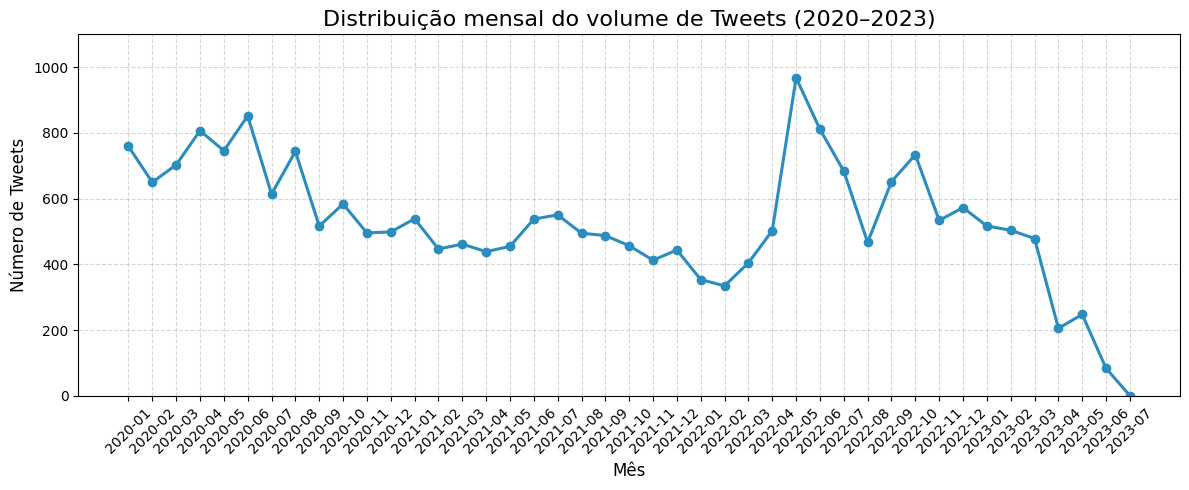

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/n/netscratch/cga/Lab/rpalbuquerque/Privacy/Tweets_Analyzed_Emotions.csv.gz")
df["date"] = pd.to_datetime(df["date"])
df["month"] = df["date"].dt.to_period("M").astype(str)

tweet_volume = df.groupby("month").size()

plt.figure(figsize=(12, 5))
plt.plot(tweet_volume.index, tweet_volume.values, marker='o', linewidth=2.2, color="#2b8cbe")

plt.title("Distribuição mensal do volume de Tweets (2020–2023)",
          fontsize=16, fontweight="medium", family="DejaVu Sans")
plt.xlabel("Mês", fontsize=12)
plt.ylabel("Número de Tweets", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0, 1100)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.savefig("Figure1_Monthly_Tweet_Volume_A1_final.png", dpi=300, bbox_inches="tight", facecolor="white")
plt.show()

In [ ]:
##✅ Figure 2 — Mean Emotion Scores (Top 8)

💬 Processando tweets: 100%|██████████| 2742184/2742184 [04:46<00:00, 9580.20it/s]


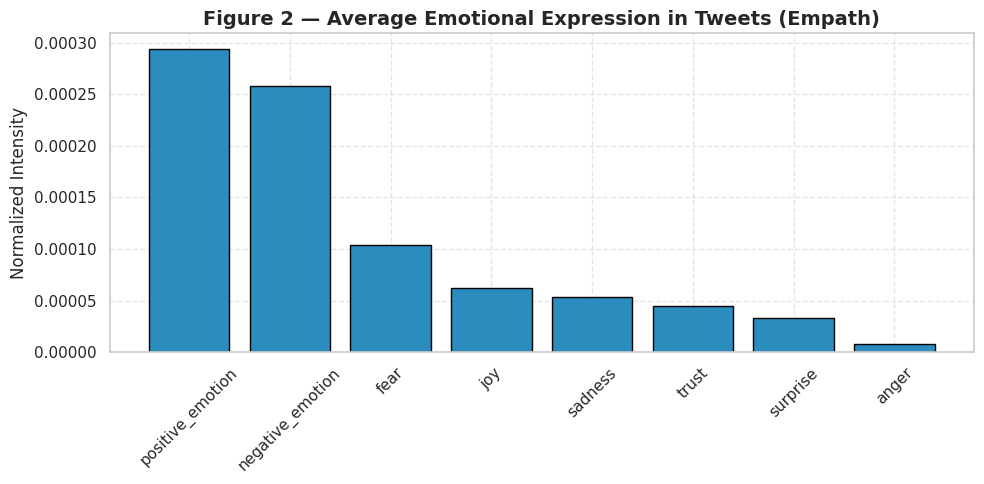

In [ ]:
import pandas as pd
from empath import Empath
import matplotlib.pyplot as plt
from tqdm import tqdm

# 📥 Carregar base
df = pd.read_csv("tweets_brasil_completo.csv.gz")
lexicon = Empath()

# ⚙️ Gerar scores emocionais com Empath
emotions_list = ['positive_emotion', 'negative_emotion', 'trust', 'sadness', 'fear', 'surprise', 'anger', 'joy']
scores = []

tqdm.pandas(desc="🔍 Analisando emoções com Empath")
for text in tqdm(df["text"], desc="💬 Processando tweets"):
    results = lexicon.analyze(text, categories=emotions_list, normalize=True)
    scores.append(results)

# 🔗 Adicionar ao DataFrame
scores_df = pd.DataFrame(scores)
df_emotions = pd.concat([df, scores_df], axis=1)

# 📊 Calcular médias
emotion_means = df_emotions[emotions_list].mean().sort_values(ascending=False)

# ✨ Plot estilo publicação A1
plt.figure(figsize=(10, 5))
bars = plt.bar(emotion_means.index, emotion_means.values, color="#2b8cbe", edgecolor='black')
plt.title("Figure 2 — Average Emotional Expression in Tweets (Empath)", fontsize=14, fontweight='bold')
plt.ylabel("Normalized Intensity", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# 💾 Salvar com fundo transparente
plt.savefig("Figure2_Emotional_Intensity_A1.png", dpi=300, transparent=True)
plt.show()

In [ ]:
##✅ Figure 3 — Monthly Psychological Impacts

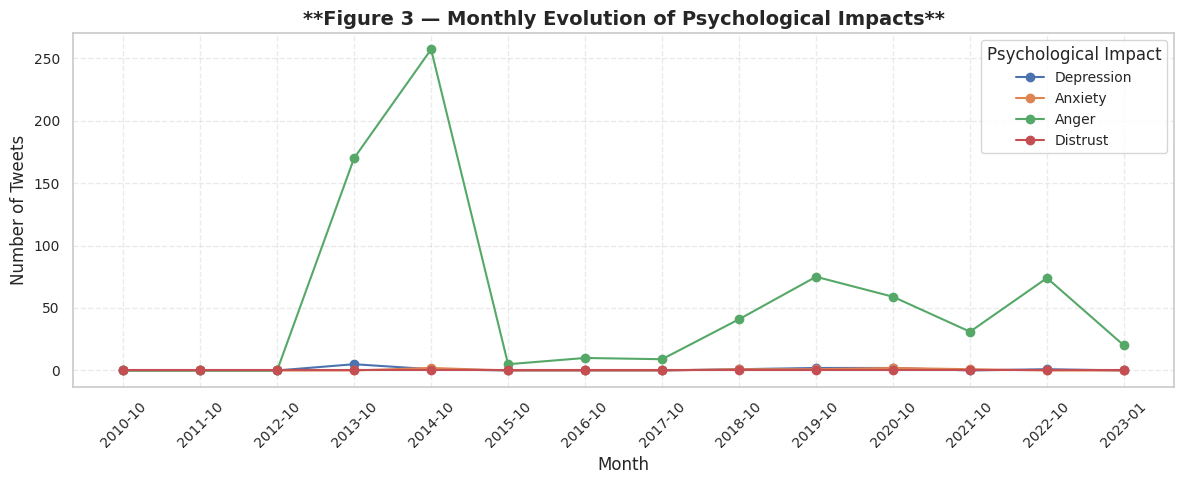

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ✅ Leitura do arquivo com os dados já processados
df = pd.read_csv("tweets_brasil_completo.csv.gz")  # ajuste o caminho se necessário

# ✅ Garante que a coluna de data está em formato datetime
df["date"] = pd.to_datetime(df["date"])
df["month"] = df["date"].dt.to_period("M").astype(str)

# ✅ Criação de colunas binárias para cada impacto psicológico
df["Depression"] = df["text"].str.contains("depression", case=False, na=False).astype(int)
df["Anxiety"] = df["text"].str.contains("anxiety", case=False, na=False).astype(int)
df["Anger"] = df["text"].str.contains("anger", case=False, na=False).astype(int)
df["Distrust"] = df["text"].str.contains("distrust", case=False, na=False).astype(int)

# ✅ Agrupamento mensal dos impactos
psych_monthly = df.groupby("month")[["Depression", "Anxiety", "Anger", "Distrust"]].sum().reset_index()

# ✅ Plot profissional
plt.figure(figsize=(12, 5))
for col in ["Depression", "Anxiety", "Anger", "Distrust"]:
    plt.plot(psych_monthly["month"], psych_monthly[col], marker='o', label=col)

plt.title("**Figure 3 — Monthly Evolution of Psychological Impacts**", fontsize=14, fontweight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Tweets", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(title="Psychological Impact", fontsize=10)
plt.tight_layout()

# 💾 Salvar com fundo transparente
plt.savefig("Figure3_Psych_Impacts_A1.png", dpi=300, transparent=True)
plt.show()

In [ ]:
##✅ Figure 4 — Monthly Well-being Impacts

/tmp/ipykernel_2814323/1154075993.py:10: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Autonomy"] = df["text"].str.contains(r"\b(freedom|control|autonomy|independent|empowered|self[- ]?regulat)", case=False, na=False).astype(int)
/tmp/ipykernel_2814323/1154075993.py:11: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Disconnection"] = df["text"].str.contains(r"\b(disconnected|logout|away|detox|offline|delete[d]?\s+account)", case=False, na=False).astype(int)
/tmp/ipykernel_2814323/1154075993.py:12: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Digital_Fatigue"] = df["text"].str.contains(r"\b(burnout|tired|exhausted|drained|screen\s*time|overwhelmed)", case=False, na=False).astype(int)
/tmp/ipykernel_2814323/115407

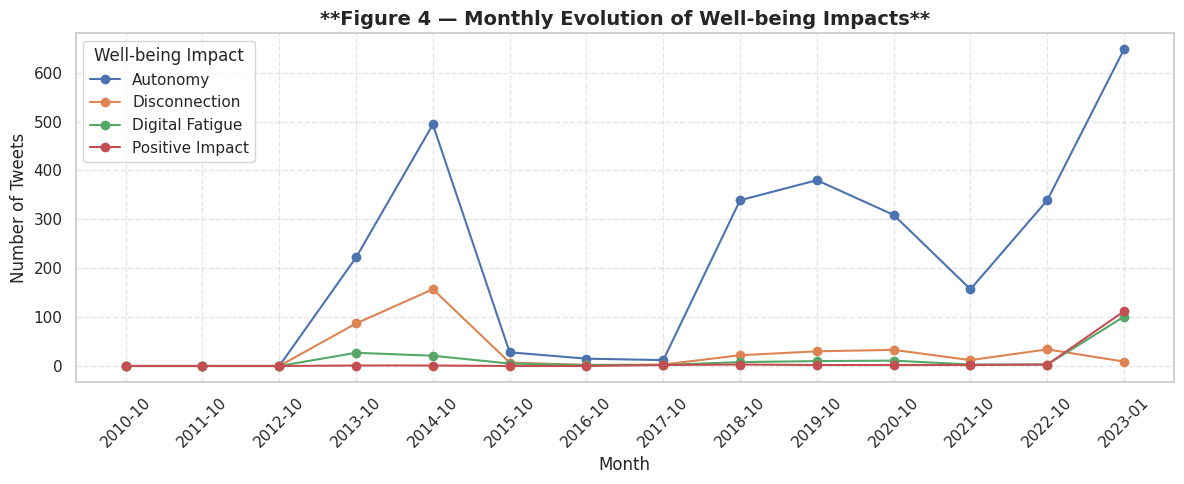

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 🔹 Leitura do arquivo de dados
df = pd.read_csv("tweets_brasil_completo.csv.gz")  # ajuste se necessário
df["date"] = pd.to_datetime(df["date"])
df["month"] = df["date"].dt.to_period("M").astype(str)

# 🔹 Mapeamento robusto via regex para cada categoria de impacto
df["Autonomy"] = df["text"].str.contains(r"\b(freedom|control|autonomy|independent|empowered|self[- ]?regulat)", case=False, na=False).astype(int)
df["Disconnection"] = df["text"].str.contains(r"\b(disconnected|logout|away|detox|offline|delete[d]?\s+account)", case=False, na=False).astype(int)
df["Digital_Fatigue"] = df["text"].str.contains(r"\b(burnout|tired|exhausted|drained|screen\s*time|overwhelmed)", case=False, na=False).astype(int)
df["Positive_Impact"] = df["text"].str.contains(r"\b(grateful|productive|healthy\s+use|mindful|balanced|enjoy(ed|ing)?\s+offline)", case=False, na=False).astype(int)

# 🔹 Agrupamento mensal
cols = ["Autonomy", "Disconnection", "Digital_Fatigue", "Positive_Impact"]
monthly_wellbeing = df.groupby("month")[cols].sum().reset_index()

# 🔹 Plot com estilo profissional
plt.figure(figsize=(12, 5))
for col in cols:
    plt.plot(monthly_wellbeing["month"], monthly_wellbeing[col], label=col.replace("_", " "), marker='o')

plt.title("**Figure 4 — Monthly Evolution of Well-being Impacts**", fontsize=14, fontweight="bold")
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Tweets", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Well-being Impact")
plt.tight_layout()

# 💾 Salvar figura (opcional)
plt.savefig("Figure4_Wellbeing_Impacts_Revised.png", dpi=300, transparent=True)
plt.show()

In [ ]:
##✅ Table 1 — Top 10 Topics by Volume

In [ ]:
import pandas as pd

# Caminho salvo pelo Bloco 10
path = "/n/netscratch/cga/Lab/rpalbuquerque/Privacy/Topic_Tweet_Examples.csv.gz"

# Ler arquivo
df = pd.read_csv(path)

# Exibir 3 exemplos por cluster
df_table = df.groupby("Cluster").head(3).reset_index(drop=True)

# Salvar tabela formatada
df_table.to_csv("/n/netscratch/cga/Lab/rpalbuquerque/Privacy/Table_Topic_Examples.csv", index=False)

# Mostrar
import IPython.display as disp
disp.display(df_table)

,Cluster,Date,Tweet,Sentiment_Label
0,0,2021-03-01 22:39:58,No photos allowed at the Arlington vaccination...,Neutral
1,0,2020-03-02 15:04:01,#Coronavirus #WHO #CDC #NHS #Outbreak #Pandemi...,Neutral
2,0,2021-06-09 08:55:40,@EdDesignerSRH Was it an online booking? I had...,Negative
3,1,2021-07-07 21:32:28,@MattWalshBlog You talk teacher privacy … what...,Neutral
4,1,2022-12-07 05:31:03,@Breaking911 DELETE THIS TWEET. 🤬 \n\nYou are ...,Negative
5,1,2022-10-09 03:32:16,@robreiner Hey moron u can Inly have how many ...,Negative
6,2,2021-01-18 20:20:00,@KatieHill4CA I will pray for your family and ...,Neutral
7,2,2021-12-31 03:56:01,@JChurchRadio #f2b you absolutely keep your pr...,Neutral
8,2,2022-06-27 16:51:49,@MoistScabs @RELIk_devil @MichaelRCaputo @Pink...,Negative
9,3,2021-06-18 15:18:58,@ThatGirlChip I have worked in hotels all my l...,Negative


In [ ]:
##Heatmap

/tmp/ipykernel_2814323/4187106590.py:9: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['Depression'] = df['text'].str.contains(r'\b(depression|depressed|hopeless|worthless)\b', case=False, na=False).astype(int)
/tmp/ipykernel_2814323/4187106590.py:10: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['Anxiety'] = df['text'].str.contains(r'\b(anxiety|anxious|nervous|panic)\b', case=False, na=False).astype(int)
/tmp/ipykernel_2814323/4187106590.py:11: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['Distrust'] = df['text'].str.contains(r'\b(distrust|suspicious|skeptical|untrustworthy)\b', case=False, na=False).astype(int)
/tmp/ipykernel_2814323/4187106590.py:12: UserWarning: This pattern is interpreted as a regular expressi

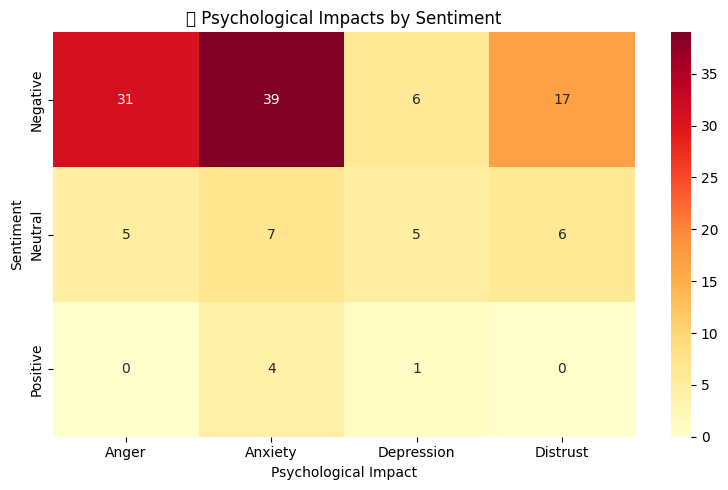

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Usar df já existente e garantir coluna 'month'
df['month'] = pd.to_datetime(df['date']).dt.to_period('M').astype(str)

# ✅ Criar colunas binárias para impactos psicológicos (com base no texto)
df['Depression'] = df['text'].str.contains(r'\b(depression|depressed|hopeless|worthless)\b', case=False, na=False).astype(int)
df['Anxiety'] = df['text'].str.contains(r'\b(anxiety|anxious|nervous|panic)\b', case=False, na=False).astype(int)
df['Distrust'] = df['text'].str.contains(r'\b(distrust|suspicious|skeptical|untrustworthy)\b', case=False, na=False).astype(int)
df['Anger'] = df['text'].str.contains(r'\b(anger|angry|furious|outraged)\b', case=False, na=False).astype(int)

# ✅ Criar coluna com impacto dominante (se houver)
def get_main_impact(row):
    for impact in ['Depression', 'Anxiety', 'Distrust', 'Anger']:
        if row[impact] == 1:
            return impact
    return 'None'

df['Main_Psych_Impact'] = df.apply(get_main_impact, axis=1)

# ✅ Filtrar apenas os tweets com impacto psicológico
df_filtered = df[df['Main_Psych_Impact'] != 'None']

# ✅ Criar tabela cruzada: Sentimento × Impacto
heatmap_data = pd.crosstab(df_filtered['Sentiment'], df_filtered['Main_Psych_Impact'])

# ✅ Plotar heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlOrRd')
plt.title("🔍 Psychological Impacts by Sentiment")
plt.ylabel("Sentiment")
plt.xlabel("Psychological Impact")
plt.tight_layout()
plt.show()

/tmp/ipykernel_2814323/2798384964.py:18: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[col] = df["text"].str.contains(
/tmp/ipykernel_2814323/2798384964.py:18: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[col] = df["text"].str.contains(
/tmp/ipykernel_2814323/2798384964.py:18: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[col] = df["text"].str.contains(
/tmp/ipykernel_2814323/2798384964.py:18: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[col] = df["text"].str.contains(


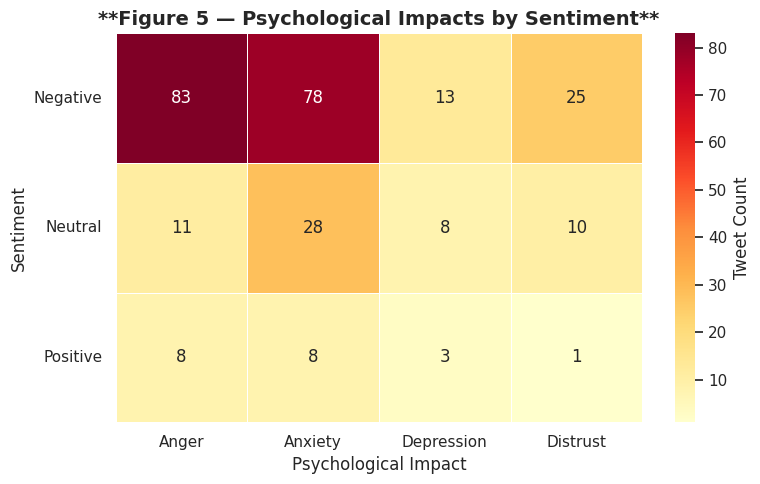

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 📥 Carregar o arquivo final com os labels já aplicados
file_path = "/n/netscratch/cga/Lab/rpalbuquerque/Privacy/Tweets_Analyzed_Emotions.csv.gz"
df = pd.read_csv(file_path, compression="gzip")
df["date"] = pd.to_datetime(df["date"])

# ✅ Verificar se a coluna 'Sentiment' já existe
if "Sentiment" not in df.columns:
    raise ValueError("A coluna 'Sentiment' não está presente no dataframe.")

# ✅ Colunas de impacto psicológico
impact_cols = ["Depression", "Anxiety", "Anger", "Distrust"]
for col in impact_cols:
    if col not in df.columns:
        df[col] = df["text"].str.contains(
            {
                "Depression": r"\b(depression|depressed|hopeless|empty|numb)\b",
                "Anxiety": r"\b(anxiety|anxious|panic|worried|nervous|uneasy)\b",
                "Anger": r"\b(angry|furious|rage|mad|irritated|pissed)\b",
                "Distrust": r"\b(distrust|don’t trust|not trust|lack of trust|skeptical|suspicious)\b",
            }[col],
            case=False, na=False
        ).astype(int)

# 🔄 Derretendo o dataframe para gerar contagem cruzada
df_melted = df.melt(id_vars="Sentiment", value_vars=impact_cols,
                    var_name="Psychological Impact", value_name="Presence")

# ✅ Filtrar apenas onde a presença foi identificada
df_filtered = df_melted[df_melted["Presence"] == 1]

# 🔢 Criar tabela cruzada
heatmap_data = (
    df_filtered.groupby(["Sentiment", "Psychological Impact"])
    .size()
    .unstack()
    .fillna(0)
    .astype(int)
)

# 📊 Plotar heatmap com padrão A1
plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlOrRd", linewidths=0.5, cbar_kws={"label": "Tweet Count"})

plt.title("**Figure 5 — Psychological Impacts by Sentiment**", fontsize=14, weight='bold')
plt.xlabel("Psychological Impact", fontsize=12)
plt.ylabel("Sentiment", fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("Figure5_Heatmap_A1.png", dpi=300, transparent=True)
plt.show()